# Dice Game Monte Carlo 

In [1]:
# Imports 

import random 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statistics 
import collections 

In [2]:
def roll_dice():
    return (random.randint(1,6))


#### Expected Value of a Dice Throw 

In [3]:
# Dice throw function
def dice_throw():
    dice_one = roll_dice()
    dice_two = roll_dice()
    
    score = dice_one + dice_two 
    
    # Dice rules 
    if (dice_one == 1) or (dice_two == 1):
        score = 0 
    elif  (dice_one == dice_two):
        score = score * 2 
    return(score)

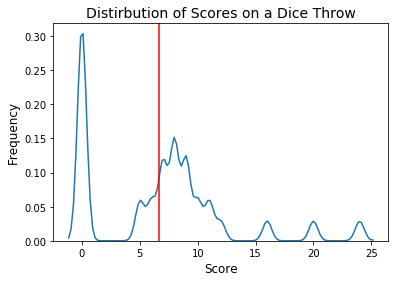

In [4]:
games = []

# Simulate 1,000,000 tosses
for i in range(1000000):
    games.append(dice_throw())

# Plot
sns.kdeplot(games)
plt.axvline(x = statistics.mean(games), color = 'red')
plt.title('Distirbution of Scores on a Dice Throw', fontsize = 14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [5]:
# Get counts of each score
ctr = collections.Counter(games)
keys = [i for i in ctr.keys()]
values = [i for i in ctr.values()]

# Throw into df
df = pd.DataFrame({'score': keys, 'count': values}, index=range(12))
df['freq'] = df['count'] / len(games)

# Sort and show
df = df.sort_values(by=['freq'], ascending = False)
df[['score', 'count', 'freq']]

,score,count,freq
0,0,305514,0.305514
5,8,138787,0.138787
3,9,111036,0.111036
6,7,110823,0.110823
4,6,55865,0.055865
8,10,55814,0.055814
9,11,55801,0.055801
1,5,55431,0.055431
2,24,28026,0.028026
10,16,27886,0.027886


### Toss until you hit 100 

In [19]:
def straight_run_sim():
    total_score = 0 
    dub_counter = 0
    roll_score = 0
    dice_one = 0
    dice_two = 0
    turn_counter = 1
    
    while total_score < 100: 
        # Reset roll
            roll_score = 0

            # Roll dice
            dice_one = roll_dice()
            dice_two = roll_dice()

            # Doubles or not
            if dice_one == dice_two:
                if (dice_one == 1 and dice_two == 1):
                    if total_score == 0:
                        total_score = -50
                        turn_counter += 1
                    else: 
                        total_score = min(0, total_score)
                        turn_counter += 1
                else:
                    dub_counter += 1
                    roll_score = (dice_one + dice_two) * 2
            elif (dice_one == 1 or dice_two == 1):
                total_score = min(0, total_score)
                dub_counter = 0
                turn_counter += 1
            else: 
                roll_score = dice_one + dice_two 
                dub_counter = 0

            # Add your score
            total_score += roll_score 

            # 100 and 3 doubles check
            if total_score == 100:
                total_score = 0
                turn_counter += 1
            elif dub_counter == 3:
                total_score = 0
                turn_counter += 1
    return (turn_counter)



    
    
    

### Check straight run sim

In [29]:
# Turn checker 

for i in range(10):
    total_score = 0 
    dub_counter = 0
    roll_score = 0
    dice_one = 0
    dice_two = 0
    turn_counter = 1
    
    print('\n')

    while total_score < 100: 
        # Reset roll
        roll_score = 0
        
        # Roll dice
        dice_one = roll_dice()
        dice_two = roll_dice()

        # Doubles or not
        if dice_one == dice_two:
            if (dice_one == 1 and dice_two == 1):
                if total_score == 0:
                    total_score = -50
                    turn_counter += 1
                else: 
                    total_score = min(0, total_score)
                    turn_counter += 1
            else:
                dub_counter += 1
                roll_score = (dice_one + dice_two) * 2
        elif (dice_one == 1 or dice_two == 1):
            total_score = min(0, total_score)
            dub_counter = 0
            turn_counter += 1
        else: 
            roll_score = dice_one + dice_two 
            dub_counter = 0

        # Add your score
        total_score += roll_score 

        # 100 and 3 doubles check
        if total_score == 100:
            total_score = 0
            turn_counter += 1
        elif dub_counter == 3:
            total_score = 0
            turn_counter += 1


        print(turn_counter, dice_one, dice_two, total_score)






1 4 4 16
2 3 1 0
2 5 6 11
3 2 1 0
3 3 3 12
3 5 3 20
4 1 1 0
5 1 5 0
5 6 5 11
5 3 6 20
5 4 3 27
5 5 6 38
6 1 5 0
7 1 2 0
7 6 2 8
7 4 5 17
8 1 2 0
8 2 2 8
9 1 4 0
9 2 2 8
10 1 3 0
10 3 2 5
10 2 2 13
11 1 3 0
11 2 3 5
11 5 6 16
12 2 1 0
12 3 3 12
13 1 6 0
13 6 3 9
13 6 2 17
13 4 6 27
13 3 6 36
13 4 3 43
14 5 1 0
14 3 2 5
14 5 5 25
14 3 2 30
14 6 6 54
15 3 1 0
16 3 1 0
16 3 4 7
16 4 4 23
16 6 2 31
16 6 6 55
16 6 4 65
16 6 4 75
16 2 3 80
17 1 5 0
18 1 2 0
19 5 1 0
19 2 6 8
20 1 1 0
20 6 3 9
21 1 3 0
22 1 3 0
22 4 4 16
22 3 6 25
22 2 4 31
22 2 5 38
22 2 2 46
22 5 6 57
22 5 2 64
22 2 5 71
22 3 4 78
23 1 1 0
23 4 5 9
24 6 1 0
24 5 4 9
25 1 4 0
25 6 6 24
25 5 6 35
25 2 4 41
25 6 6 65
25 4 4 81
25 2 4 87
25 5 3 95
25 2 4 101


1 4 6 10
2 5 1 0
2 3 3 12
2 2 3 17
3 1 3 0
3 3 5 8
3 3 2 13
3 5 6 24
3 4 2 30
3 2 6 38
4 3 1 0
4 2 2 8
5 2 1 0
5 6 3 9
5 5 5 29
6 1 1 0
7 1 5 0
7 3 3 12
8 1 5 0
8 4 2 6
8 2 5 13
9 1 3 0
9 2 5 7
9 6 3 16
9 4 5 25
9 5 6 36
9 4 3 43
9 6 3 52
9 6 2 60
9 2 6 68
9 6 3 77
9 6 3

42 1 4 0
42 2 2 8
42 6 3 17
43 3 1 0
43 5 5 20
43 5 4 29
43 2 4 35
43 2 4 41
43 3 4 48
44 1 2 0
44 4 3 7
45 1 1 0
45 5 5 20
45 6 5 31
46 6 1 0
46 6 2 8
46 5 5 28
47 1 3 0
47 4 2 6
47 6 2 14
47 4 6 24
47 5 3 32
48 1 4 0
49 5 1 0
49 3 2 5
49 3 3 17
49 3 3 29
49 5 6 40
50 4 1 0
50 4 6 10
50 4 5 19
50 6 2 27
50 3 5 35
51 6 1 0
52 1 5 0
52 4 6 10
52 2 5 17
53 1 6 0
53 6 6 24
53 2 3 29
54 2 1 0
54 6 6 24
54 3 2 29
55 1 6 0
55 6 5 11
55 4 4 27
56 3 1 0
56 5 4 9
56 2 3 14
56 6 2 22
57 4 1 0
58 3 1 0
58 5 5 20
58 5 4 29
58 5 6 40
59 1 2 0
59 3 4 7
59 2 5 14
60 1 6 0
60 4 5 9
61 1 1 0
61 4 4 16
61 3 4 23
62 1 3 0
63 1 5 0
64 1 2 0
64 3 4 7
64 6 5 18
64 3 6 27
65 4 1 0
65 4 3 7
65 4 3 14
66 1 6 0
66 5 2 7
66 3 6 16
67 5 1 0
68 5 1 0
68 5 2 7
69 3 1 0
69 2 4 6
69 4 6 16
69 4 6 26
70 1 2 0
71 1 1 -50
71 2 5 -43
72 1 6 -43
72 3 2 -38
73 3 1 -38
73 6 2 -30
73 6 3 -21
73 3 3 -9
73 4 3 -2
73 6 2 6
73 3 2 11
73 5 6 22
73 3 6 31
73 4 2 37
74 2 1 0
75 1 2 0
76 2 1 0
76 5 6 11
76 5 6 22
77 1 4 0
77 6 2 8
7

13 5 4 50
13 2 2 58
13 4 5 67
13 4 4 83
13 6 4 93
14 1 1 0
15 3 1 0
16 4 1 0
16 4 3 7
16 2 4 13
16 5 2 20
16 3 3 32
17 1 3 0
17 2 5 7
17 6 6 31
17 3 4 38
18 2 1 0
19 1 1 -50
19 5 3 -42
20 1 5 -42
20 5 2 -35
20 4 4 -19
20 6 6 5
20 6 4 15
20 3 4 22
20 2 4 28
21 1 2 0
22 1 6 0
22 4 3 7
22 2 5 14
23 1 2 0
23 2 4 6
23 4 6 16
24 5 1 0
24 6 4 10
24 3 2 15
24 5 3 23
25 4 1 0
26 2 1 0
27 1 6 0
27 2 3 5
27 5 5 25
27 4 2 31
27 3 3 43
28 1 1 0
29 5 1 0
30 1 6 0
31 2 1 0
31 6 4 10
31 5 5 30
32 5 1 0
33 3 1 0
33 4 6 10
34 1 5 0
34 4 4 16
34 6 3 25
34 4 6 35
34 3 3 47
34 6 6 71
34 6 4 81
34 5 2 88
35 1 2 0
36 1 2 0
36 4 5 9
36 5 5 29
36 3 5 37
36 3 6 46
37 4 1 0
38 1 2 0
38 3 4 7
39 3 1 0
39 6 3 9
39 3 2 14
39 2 2 22
39 5 3 30
40 4 1 0
41 5 1 0
41 4 2 6
41 6 4 16
41 4 5 25
41 2 4 31
41 5 2 38
42 1 2 0
42 4 2 6
42 4 2 12
42 6 3 21
42 6 5 32
42 6 2 40
43 3 1 0
44 1 3 0
44 5 3 8
44 4 3 15
45 3 1 0
45 4 2 6
45 4 2 12
46 1 4 0
46 5 3 8
46 4 3 15
46 3 2 20
46 5 5 40
46 2 3 45
46 5 5 65
47 1 1 0
47 6 4 10
4

In [25]:
straight_games = []

# Simulate 1,000,000 tosses
for i in range(100000):
    straight_games.append(straight_run_sim())

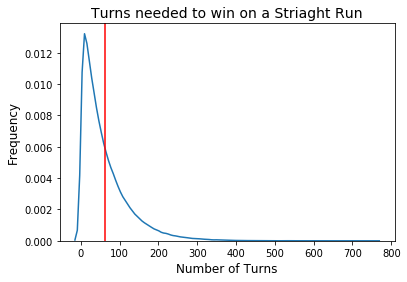

In [31]:
# Plot
sns.kdeplot(straight_games)
plt.axvline(x = statistics.mean(straight_games), color = 'red')
plt.title('Turns needed to win on a Striaght Run', fontsize = 14)
plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [30]:
statistics.mean(straight_games)

62.29447

In [27]:
# Get counts of each score
ctr = collections.Counter(straight_games)
keys = [i for i in ctr.keys()]
values = [i for i in ctr.values()]

# Throw into df
df = pd.DataFrame({'score': keys, 'count': values}, index=range(len(ctr)))
df['freq'] = df['count'] / len(games)

# Sort and show
df = df.sort_values(by=['freq'], ascending = False)
df[['score', 'count', 'freq']]

,score,count,freq
4,3,1667,0.001667
27,1,1648,0.001648
12,2,1577,0.001577
73,4,1516,0.001516
9,5,1513,0.001513
36,7,1493,0.001493
52,8,1444,0.001444
14,6,1428,0.001428
103,10,1388,0.001388
42,9,1366,0.001366


In [32]:
statistics.mean(games)

6.668649